In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

# Case1: two-dimensional projection

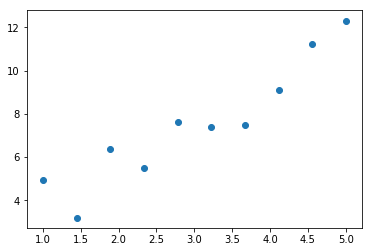

In [2]:
ϵ1 = 3
x1 = np.linspace(1,5,10)
y1 = 2*x1 + 1+ (2*ϵ1*np.random.rand(10)-ϵ1)
plt.scatter(x1,y1)
plt.show()

In [3]:
y1.max()

12.311629704872391

In [4]:
#feature scaling:
x1 = (x1-x1.mean())/(x1.max()-x1.min())
y1 = (y1-y1.mean())/(y1.max()-y1.min())
X1_scale = np.c_[x1,y1]

λ1 = [0.18014809 0.00603932]
eigvector = [[ 0.74182393 -0.67059471]
 [ 0.67059471  0.74182393]]
After we sort them from max to min:
λ1 = [0.18014809 0.00603932]
eigvector = [[ 0.74182393 -0.67059471]
 [ 0.67059471  0.74182393]]


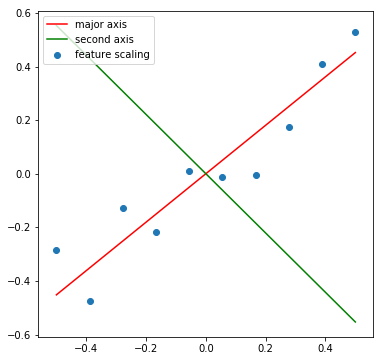

In [5]:
# calculate the Σ :
Σ1 = np.matrix(np.zeros((2,2)))
for i in range(len(X1_scale)):
    Xi = np.matrix(X1_scale[i,:])
    Σ1 += 1/(len(X1_scale))*(Xi.T*Xi) # we have n by n matrix
    
# solve the eigenvectors and eigenvalues of Σ:
λ1, v1 = np.linalg.eig(Σ1)
print('λ1 = {}'.format(λ1))
print('eigvector = {}'.format(v1))
print('After we sort them from max to min:')

index1 = np.argsort(λ1)[::-1]
λ1 = λ1[index1]
v1 = v1[:,index1]
print('λ1 = {}'.format(λ1))
print('eigvector = {}'.format(v1))

plt.figure(figsize=(6,6))
plt.scatter(X1_scale[:,0], X1_scale[:,1], label = 'feature scaling')
plt.plot(X1_scale[:,0], v1[1,0]/v1[0,0]*X1_scale[:,0], label = 'major axis', c = 'r')
plt.plot(X1_scale[:,0], v1[1,1]/v1[0,1]*X1_scale[:,0], label = 'second axis', c = 'g')
plt.legend(loc = 2)
plt.show()

# 3-D Projection on a plane

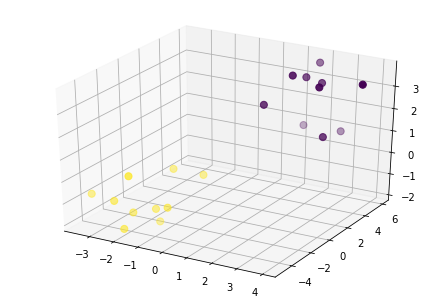

In [6]:
# to generate two clusters in 3D
X2, y2 = make_blobs(centers=[[2,4,3],[-2,-3,-1]], n_features = 3, n_samples = 20)

fig = plt.figure(1)
ax = Axes3D(fig)
ax.scatter3D(X2[:,0],X2[:,1],X2[:,2], c = y2, s = 50)
plt.show()

In [7]:
# feature scaling:
for j in range(3):
    X2[:,j] = (X2[:,j]-X2[:,j].mean())/(X2[:,j].max()-X2[:,j].min())

# implement PCA for this case:
Σ2 = np.matrix(np.zeros((3,3)))
for k in range(len(X2)):
    Xi = np.matrix(X2[k,:])
    Σ2 += 1/len(X2)*Xi.T*Xi
# solve the eigvalues and eigvectors which are sorted
λ2 , v2 = np.linalg.eig(Σ2)
index2 = np.argsort(λ2)[::-1]
λ2 = λ2[index2]
v2 = v2[:,index2]

print('λ2 = {}'.format(λ2))
print('eigvector = {}'.format(v2))

λ2 = [0.31548202 0.01945648 0.00405578]
eigvector = [[-0.48848994 -0.68813877  0.53650965]
 [-0.61833331 -0.16083656 -0.76928247]
 [-0.61566346  0.70752854  0.34693208]]


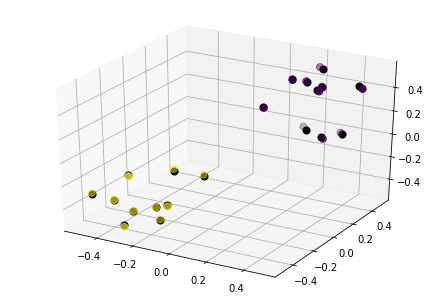

In [8]:
# plot the 2D surface which is the projected plane:
Z = (v2[:,:2].T)*(X2.T) # Zi = Ureduce.T * Xi, where 2 axes are considered

fig = plt.figure(2)
ax = Axes3D(fig)
ax.scatter3D(X2[:,0],X2[:,1],X2[:,2], c = y2, s = 50)

# now we want to represent all projected points with respect to x,y,z axes(same axes)
for l in range(len(X2)):
    Zi = Z[0,l]*v2[:,0]+Z[1,l]*v2[:,1]
    ax.scatter3D(Zi[0],Zi[1],Zi[2], c = 'black', s = 50)
    
plt.show()